In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import wire
import biotsavart
import pdb
from Bezier import Bezier

In [2]:
w = wire.Wire(path=wire.Wire.AlphaVortex(h=0.5,gamma=1.5,lamb=0.5,translate=2.34,scale=1.3), discretization_length=0.02, current=100).Rotate(axis=(1, 0, 0), deg=90).Rotate(axis=(0, 0, 1), deg=180)#.Translate((0, -1.3, 0))

In [4]:
sol  = biotsavart.BiotSavart(wire=w)

In [5]:
resolution = 0.05
volume_corner1 = (-12, -1, -1)
volume_corner2 = (3.5, 2, 1)

In [6]:
# matplotlib plot 2D
# create list of xy coordinates
grid = np.mgrid[volume_corner1[0]:volume_corner2[0]:resolution, volume_corner1[1]:volume_corner2[1]:resolution]

# create list of grid points
points = np.vstack(map(np.ravel, grid)).T
points = np.hstack([points, np.zeros([len(points),1])])

/tmp/ipykernel_1255649/729601750.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points = np.vstack(map(np.ravel, grid)).T


In [7]:
# calculate B field at given points
B  = sol.CalculateB(points=points)

Babs  = np.linalg.norm(B, axis=1)

# remove big values close to the wire
cutoff = 0.0003
B[Babs > cutoff]   = [np.nan,np.nan,np.nan]

found 1 wire(s).
wire 1 has 596 segments
total number of segments: 596
number of field points: 18600
total number of calculations: 11085600
time needed for calculation: 1.7113436000000002 s


In [8]:
Ux=B[:, 0]
Uy=B[:, 1]
Uz=B[:, 2]

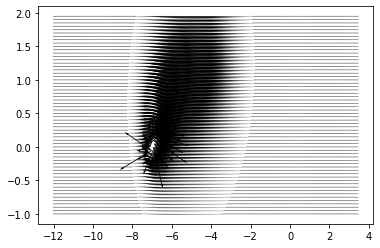

In [9]:
fig = plt.figure()
ax = fig.gca()
ax.quiver(points[:, 0], points[:, 1], Ux, Uy)
X = np.unique(points[:, 0])
Y = np.unique(points[:, 1])
plt.show()

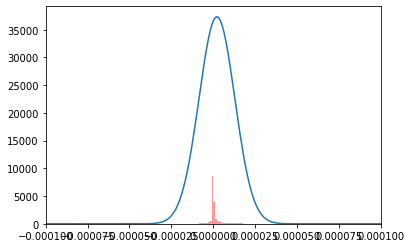

/tmp/ipykernel_1255649/2673633482.py:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points = np.vstack(map(np.ravel, grid)).T


found 1 wire(s).
wire 1 has 596 segments
total number of segments: 596
number of field points: 93000
total number of calculations: 55428000
time needed for calculation: 8.542606226 s


/tmp/ipykernel_1255649/2673633482.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


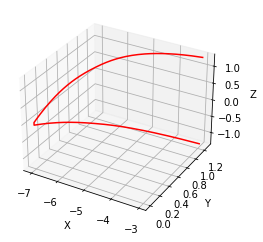

In [11]:
_, bins_x, _ =plt.hist(Ux,450,alpha=0.4,color='red')
#_, bins_y, _ =plt.hist(Uy,450,alpha=0.4,color='blue')
#_, bins_z, _ =plt.hist(Uz,450,alpha=0.4,color='green')
mu, sigma = scipy.stats.norm.fit(Ux[~np.isnan(Ux)])
best_fit_line = scipy.stats.norm.pdf(bins_x, mu, sigma)
plt.plot(bins_x, best_fit_line)

plt.xlim([-0.0001,0.0001])
plt.show()

# matplotlib plot 3D
grid = np.mgrid[volume_corner1[0]:volume_corner2[0]:resolution*2, volume_corner1[1]:volume_corner2[1]:resolution*2, volume_corner1[2]:volume_corner2[2]:resolution*2]

# create list of grid points
points = np.vstack(map(np.ravel, grid)).T

# calculate B field at given points
B = sol.CalculateB(points=points)

Babs = np.linalg.norm(B, axis=1)

fig = plt.figure()
# 3d quiver
ax = fig.gca(projection='3d')
sol.mpl3d_PlotWires(ax)
#ax.quiver(points[:, 0], points[:, 1], points[:, 2], B[:, 0], B[:, 1], B[:, 2], length=0.09)
plt.show()

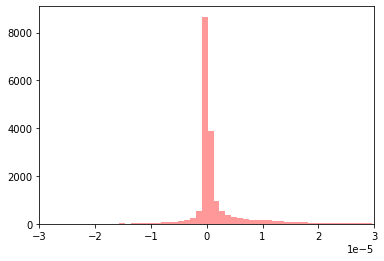

In [15]:
plt.hist(Ux,450,alpha=0.4,color='red')
plt.xlim([-0.00003,0.00003])
plt.show()